### South African Heart Disease
#### Building and comparing three classifiers on the South African Heart Disease dataset from the book:  ["Elements of Statistical Learning"](https://web.stanford.edu/~hastie/ElemStatLearn/).

In [132]:
# Import all the necessary modules

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn import metrics

## Preprocessing

In [86]:
heart_data = pd.read_csv("C:/Users/tilin/Desktop/SAheart.csv")

In [87]:
# Print heart_data shape and the first five rows
print(heart_data.shape)
heart_data.head(5)

(462, 11)


,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


> "A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of CHD. Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in  Rousseauw et al, 1983, South African Medical Journal." 

        sbp	        systolic blood pressure
        tobacco		cumulative tobacco (kg)
        ldl		    low densiity lipoprotein cholesterol
        adiposity
        famhist		family history of heart disease (Present, Absent)
        typea		  type-A behavior
        obesity
        alcohol		current alcohol consumption
        age		    age at onset
        chd		    label, coronary heart disease


In [88]:
# The first column, row.names is useless for this ML task, drop it!
heart_data = heart_data.drop(columns=['row.names'])

print(heart_data.shape)
heart_data.head(5)

(462, 10)


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [89]:
# Get the features' data types (dtypes)
heart_data.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

In [90]:
# Convert 'famhist' from categorical (object type with Present/Absent values) to numeric {0,1} values
heart_data['famhist'] = heart_data['famhist'].astype('category')
heart_data['famhist'] = heart_data['famhist'].cat.codes

heart_data.head(5)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [91]:
# Check that the type of famhist is int
type(heart_data['famhist'][0])

numpy.int8

In [92]:
# Create X, y, which means separate features from class labels 
X = heart_data.drop(columns=['chd'])
y = heart_data['chd']

print(X.shape)
print(y.shape)

(462, 9)
(462,)


In [93]:
X.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49


In [94]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: chd, dtype: int64

In [95]:
# Split the data to train and test using train_test_split method with test_size=0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(309, 9)
(309,)
(153, 9)
(153,)


## Binary Classification

In [96]:
# Create a LogisticRegression with a 'liblinear' solver
logreg_clf = LogisticRegression(solver = 'liblinear')

# Perform a 10-fold cross validation with scoring='roc_auc'
logreg_cv_score = cross_val_score(logreg_clf, X, y, cv = 10, scoring = 'roc_auc')

print("Mean CV Score - Logistic Regression: ", logreg_cv_score.mean())

Mean CV Score - Logistic Regression:  0.7613104838709678


In [110]:
# Create a Linear SVM Classifier using LinearSVC()
svm_clf = LinearSVC(penalty = 'l2', loss = 'squared_hinge', C = 10, dual = True, max_iter = 10000)

# Perform a 10-fold cross validation with scoring='roc_auc'
svm_cv_score = cross_val_score(svm_clf, X, y, cv = 10, scoring = 'roc_auc')

print("Mean CV Score - Linear SVM: ", svm_cv_score.mean())

C:\Users\tilin\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\tilin\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\tilin\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\tilin\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\tilin\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Mean CV Score - Linear SVM:  0.754361559139785


C:\Users\tilin\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [123]:
# Create a RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 1000, criterion = 'gini', min_samples_split = 4, max_leaf_nodes = 10)

# Perform a 10-fold cross validation with scoring 'roc_auc'
rf_cv_score = cross_val_score(rf_clf, X, y, cv = 10, scoring = 'roc_auc')

print("Mean CV Score - Random Forest: ", rf_cv_score.mean())

Mean CV Score - Random Forest:  0.7526881720430108


C:\Users\tilin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tilin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tilin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\tilin\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\tilin\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\tilin\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

Text(0.5, 1.0, 'Fine-tuning max_leaf_nodes')

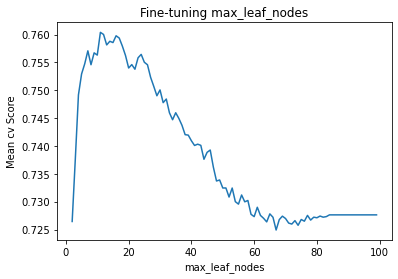

In [129]:
# Fine-tune max_leaf_nodes hyperparameter as follows:
rf_mean_cv_scores = []
max_leaf_nodes_list = range(1, 100)

for num in max_leaf_nodes_list:
    new_rf_clf = RandomForestClassifier(max_leaf_nodes = num, random_state=42)
    new_rf_cv_score = cross_val_score(new_rf_clf, X, y, scoring = "roc_auc", cv = 10)
    rf_mean_cv_scores.append(new_rf_cv_score.mean())
    
plt.plot(max_leaf_nodes_list, rf_mean_cv_scores)
plt.xlabel('max_leaf_nodes')
plt.ylabel('Mean cv Score')
plt.title('Fine-tuning max_leaf_nodes')

In [130]:
# Train the rf_clf on the training set using .fit() method
rf_clf.fit(X_train, y_train)

# Get feature_importances of rf_clf for all features
for name, score in zip(heart_data, rf_clf.feature_importances_):
    print(name, score)

sbp 0.14875471843813137
tobacco 0.12677487350206806
ldl 0.14954857572501243
adiposity 0.13256078844865277
famhist 0.04244016126124352
typea 0.08214165375654839
obesity 0.07811422045026781
alcohol 0.05419395070896736
age 0.1854710577091082


In [133]:
# Get class probabilities, fpr, tpr and threshold for random forest
rf_probs = rf_clf.predict_proba(X_test)
rf_preds = rf_probs[:,1]
rf_fpr, rf_tpr, rf_threshold = metrics.roc_curve(y_test, rf_preds)
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)

Text(0.5, 0, 'False Positive Rate')

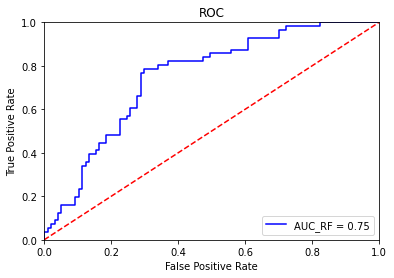

In [134]:
# Plot ROC curve
plt.title('ROC')
plt.plot(rf_fpr, rf_tpr, 'b', label = 'AUC_RF = %0.2f' % rf_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [135]:
# Train the svm_clf and logreg_clf on the training set using .fit() method
svm_clf.fit(X_train, y_train)
logreg_clf.fit(X_train, y_train)

C:\Users\tilin\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LogisticRegression(solver='liblinear')

Text(0.5, 0, 'False Positive Rate')

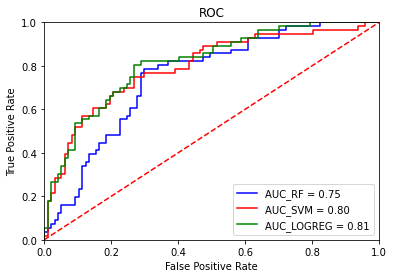

In [139]:
# Plot ROC for all three classifiers in one plot, and with AUC scores shown on the 'lower right' of the plot.
logreg_probs = logreg_clf.predict_proba(X_test)
logreg_preds = logreg_probs[:,1]
logreg_fpr, logreg_tpr, logreg_threshold = metrics.roc_curve(y_test, logreg_preds)
logreg_roc_auc = metrics.auc(logreg_fpr, logreg_tpr)

svm_preds = svm_clf.decision_function(X_test)
svm_fpr, svm_tpr, svm_threshold = metrics.roc_curve(y_test, svm_preds)
svm_roc_auc = metrics.auc(svm_fpr, svm_tpr)

plt.title('ROC')
plt.plot(rf_fpr, rf_tpr, 'b', label = 'AUC_RF = %0.2f' % rf_roc_auc)
plt.plot(svm_fpr, svm_tpr, 'r', label = 'AUC_SVM = %0.2f' % svm_roc_auc)
plt.plot(logreg_fpr, logreg_tpr, 'g', label = 'AUC_LOGREG = %0.2f' % logreg_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')